In [116]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import pandas as pd

In [117]:
file_path = "../Data/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(file_path)

In [118]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [119]:
df.drop(columns=['id'], inplace=True)

In [120]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [121]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [122]:
imputer = SimpleImputer(strategy="mean")
df["bmi"] = imputer.fit_transform(df[["bmi"]])

In [123]:
df = pd.get_dummies(df, drop_first=True)

In [124]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,True,False,True,False,True,False,False,True,True,False,False
1,61.0,0,0,202.21,28.893237,1,False,False,True,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,32.500000,1,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.400000,1,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.000000,1,False,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0,False,False,True,False,True,False,False,True,False,True,False
5106,81.0,0,0,125.20,40.000000,0,False,False,True,False,False,True,False,True,False,True,False
5107,35.0,0,0,82.99,30.600000,0,False,False,True,False,False,True,False,False,False,True,False
5108,51.0,0,0,166.29,25.600000,0,True,False,True,False,True,False,False,False,True,False,False


In [125]:
X = df.drop(columns=["stroke"])
y = df["stroke"]

In [126]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)

In [129]:
model_depth = nn.Sequential(
    nn.Linear(X_train.shape[1], 16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 2)   # output 2 kelas
)

In [130]:
model_breadth = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 2)
)

In [131]:
def train_model_history(model, X_train, y_train, X_test, y_test, epochs, lr):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    history = {"train_loss": [], "test_loss": [], "test_acc": []}

    for epoch in range(epochs):
        # Training step
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        # Evaluasi test set
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test).item()
            _, predicted = torch.max(test_outputs, 1)
            acc = (predicted == y_test).sum().item() / len(y_test)

        # Simpan history
        history["train_loss"].append(loss.item())
        history["test_loss"].append(test_loss)
        history["test_acc"].append(acc)

    return history

In [ ]:
def train_model_history(model, X_train, y_train, X_test, y_test, epochs, lr, optimizer):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    history = {"train_loss": [], "test_loss": [], "test_acc": []}

    for epoch in range(epochs):
        # Training step
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        # Evaluasi test set
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test).item()
            _, predicted = torch.max(test_outputs, 1)
            acc = (predicted == y_test).sum().item() / len(y_test)

        # Simpan history
        history["train_loss"].append(loss.item())
        history["test_loss"].append(test_loss)
        history["test_acc"].append(acc)

    return history

In [132]:
history_depth = train_model_history(model_depth, X_train, y_train, X_test, y_test, epochs=100, lr=0.1)

In [133]:
import matplotlib.pyplot as plt

In [134]:
history_depth['test_acc'][-1]

0.9393346379647749

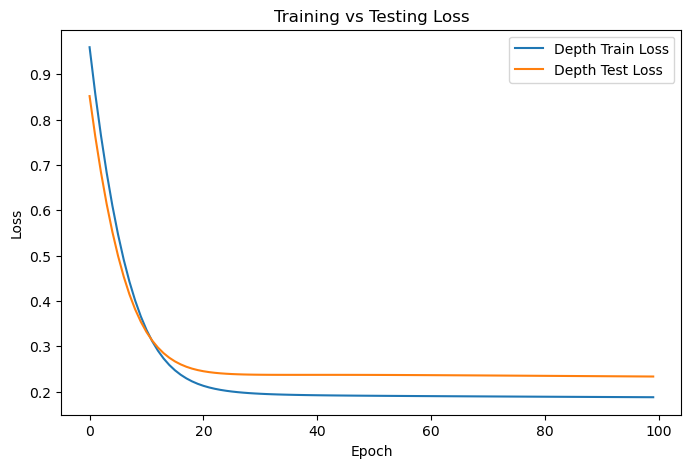

In [135]:

plt.figure(figsize=(8,5))
plt.plot(history_depth["train_loss"], label="Depth Train Loss")
plt.plot(history_depth["test_loss"], label="Depth Test Loss")
plt.title("Training vs Testing Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [136]:
history_breadth = train_model_history(model_breadth, X_train, y_train, X_test, y_test, epochs=100, lr=0.5)

In [137]:
history_breadth['test_acc'][-1]

0.9393346379647749

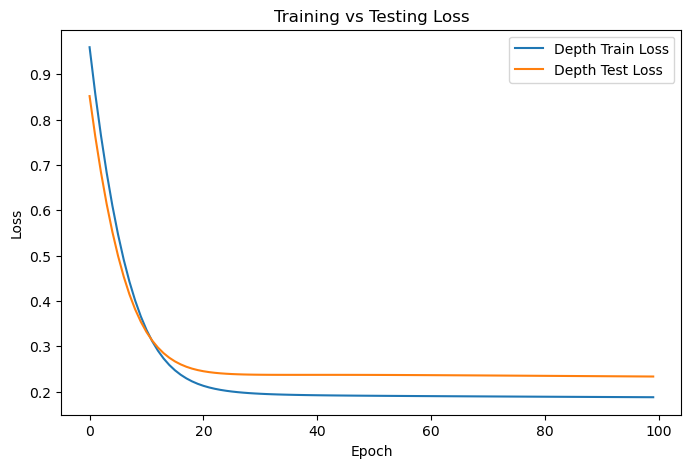

In [138]:
plt.figure(figsize=(8,5))
plt.plot(history_depth["train_loss"], label="Depth Train Loss")
plt.plot(history_depth["test_loss"], label="Depth Test Loss")
plt.title("Training vs Testing Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()